# Plotting results of the optimal training size investigation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train_size_metrics.csv')
df.head()

,provider,engine,sampler,n_for_train,seed,dataset,accuracy,precision,recall,f1
0,mistral,mistral-small-latest,random,6,36,data/USPTO_R_5450.csv,0.55,0.538462,0.823529,0.651163
1,mistral,mistral-small-latest,random,6,12345,data/USPTO_R_2725.csv,0.64,0.666667,0.588235,0.625000
2,mistral,mistral-small-latest,random,6,36,data/USPTO_R_1362.csv,0.60,0.607843,0.607843,0.607843
3,mistral,mistral-small-latest,random,6,42,data/USPTO_R_1362.csv,0.65,0.637931,0.725490,0.678899
4,mistral,mistral-small-latest,random,6,84,data/USPTO_R_1362.csv,0.56,0.545455,0.823529,0.656250


In [3]:
# Drop unnecessary columns
df.drop(columns=['provider', 'seed', 'engine', 'sampler', 'n_for_train', 'precision', 'recall'], inplace=True)
df.head()

,dataset,accuracy,f1
0,data/USPTO_R_5450.csv,0.55,0.651163
1,data/USPTO_R_2725.csv,0.64,0.625000
2,data/USPTO_R_1362.csv,0.60,0.607843
3,data/USPTO_R_1362.csv,0.65,0.678899
4,data/USPTO_R_1362.csv,0.56,0.656250


In [5]:
# Count mean, std and max of metrics
df_mean = df.groupby(by=['dataset']).mean().rename(columns={'accuracy': 'accuracy_mean', 'f1': 'f1_mean'})
df_std = df.groupby(by=['dataset']).std().rename(columns={'accuracy': 'accuracy_std', 'f1': 'f1_std'})
df_max = df.groupby(by=['dataset']).max().rename(columns={'accuracy': 'accuracy_max', 'f1': 'f1_max'})
df_all = pd.concat([df_mean, df_std, df_max], axis=1).reset_index()

# Sort dataframe by train subset size
datasets = {'data/USPTO_R_681.csv': 1, 'data/USPTO_R_1362.csv': 2, 'data/USPTO_R_2725.csv': 3, 'data/USPTO_R_5450.csv': 4, 'data/USPTO_R_text.csv': 5}
df_all['dataset_num'] = df_all.dataset.apply(lambda x: datasets[x])
df_all.sort_values(by='dataset_num', inplace=True)
df_all

,dataset,accuracy_mean,f1_mean,accuracy_std,f1_std,accuracy_max,f1_max,dataset_num
3,data/USPTO_R_681.csv,0.546,0.601901,0.028810,0.040069,0.57,0.642336,1
0,data/USPTO_R_1362.csv,0.594,0.625106,0.034351,0.042540,0.65,0.678899,2
1,data/USPTO_R_2725.csv,0.612,0.625426,0.019235,0.027264,0.64,0.660714,3
2,data/USPTO_R_5450.csv,0.570,0.629052,0.033912,0.017077,0.63,0.651163,4
4,data/USPTO_R_text.csv,0.606,0.634288,0.018166,0.043153,0.63,0.677966,5


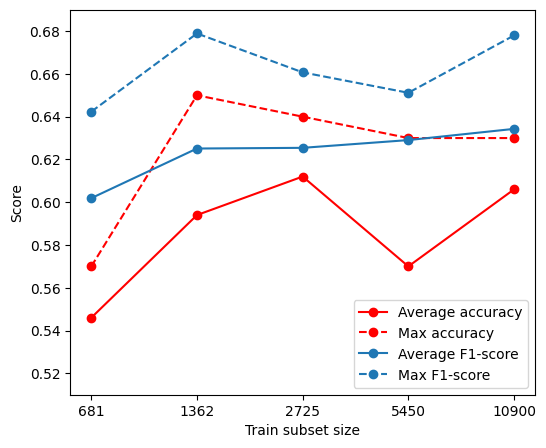

In [6]:
# Visualize results
fig, ax = plt.subplots(figsize=(6, 5))
fake_dataset_size = [100, 200, 300, 400, 500]
plt.plot(fake_dataset_size, df_all.accuracy_mean, label='Average accuracy', linestyle='-', marker='o', c='red')
plt.plot(fake_dataset_size, df_all.accuracy_max, label='Max accuracy', linestyle='--', marker='o', c='red')
plt.plot(fake_dataset_size, df_all.f1_mean, label='Average F1-score', linestyle='-', marker='o', c='#1f77b4')
plt.plot(fake_dataset_size, df_all.f1_max, label='Max F1-score', linestyle='--', marker='o', c='#1f77b4')
plt.xlabel("Train subset size")
plt.ylabel("Score")
plt.xticks(fake_dataset_size, [681, 1362, 2725, 5450, 10900])
plt.ylim(0.51, 0.69)
plt.legend(loc='lower right')
#plt.savefig('train_size.jpg', format='jpg', dpi=600, bbox_inches='tight')
plt.show()